In [1]:
import pandas as pd

df=pd.read_csv('Rice_Cammeo_Osmancik.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [4]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [5]:
print(df.isnull().sum)

<bound method DataFrame.sum of        Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     False      False              False              False         False   
1     False      False              False              False         False   
2     False      False              False              False         False   
3     False      False              False              False         False   
4     False      False              False              False         False   
...     ...        ...                ...                ...           ...   
3805  False      False              False              False         False   
3806  False      False              False              False         False   
3807  False      False              False              False         False   
3808  False      False              False              False         False   
3809  False      False              False              False         False   

      Convex_Area  Extent  Class

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [8]:
X=df.drop('Class',axis=1)   #features
y=df['Class']               #arget

In [23]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y, test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=42)
model.fit(train_X,train_y)

RandomForestClassifier(random_state=42)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

pred_y=model.predict(test_X)
print("accuracy :", accuracy_score(test_y,pred_y))
print("confusion matrix :\n", confusion_matrix(test_y,pred_y))
print("Classification report :\n", classification_report(test_y,pred_y))      

accuracy : 0.9251968503937008
confusion matrix :
 [[320  30]
 [ 27 385]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       350
           1       0.93      0.93      0.93       412

    accuracy                           0.93       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.93      0.93      0.93       762



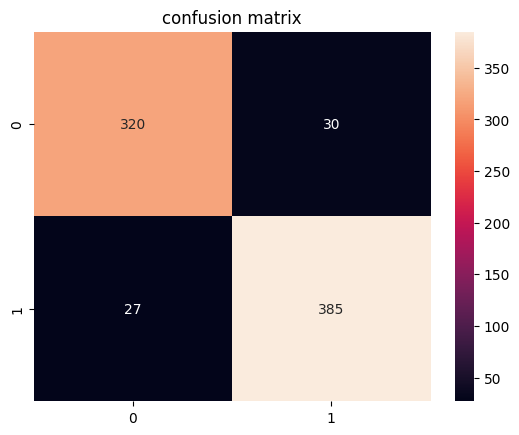

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(test_y,pred_y),annot=True,fmt='d')
plt.title("confusion matrix")
plt.show()

In [41]:
#predicting rice varities as Cmmeo or Ossmancik
# pred_y=model.predict(test_X) written before
decoded_preds=le.inverse_transform(pred_y)
print(decoded_preds[:5])

['Osmancik' 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik']


In [45]:
# now lets try using decision tree instead of random forest to compare
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)
model.fit(train_X,train_y)

DecisionTreeClassifier(random_state=42)

In [46]:
pred_yy=model.predict(test_X)
print("accuracy :", accuracy_score(test_y,pred_yy))
print("confusion matrix :\n", confusion_matrix(test_y,pred_yy))
print("Classification report :\n", classification_report(test_y,pred_yy))  

accuracy : 0.8779527559055118
confusion matrix :
 [[298  52]
 [ 41 371]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       350
           1       0.88      0.90      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.88      0.88       762
weighted avg       0.88      0.88      0.88       762

